## 1. Get Data

In [ ]:
import os
import shutil
import random
from pathlib import Path

In [ ]:
# KaggleHub dataset download
import kagglehub
dataset_path = kagglehub.dataset_download("hafiznouman786/potato-plant-diseases-data")

# Convert to a Path object
dataset_path = Path(dataset_path)

# Verify the dataset structure
print(f"Dataset downloaded to: {dataset_path}")

# List contents to check extracted files
for root, dirs, files in os.walk(dataset_path):
    print(f"{root}: {len(files)} files")


100%|██████████| 75.7M/75.7M [00:00<00:00, 132MB/s]

Extracting files...


Dataset downloaded to: /root/.cache/kagglehub/datasets/hafiznouman786/potato-plant-diseases-data/versions/2
/root/.cache/kagglehub/datasets/hafiznouman786/potato-plant-diseases-data/versions/2: 0 files
/root/.cache/kagglehub/datasets/hafiznouman786/potato-plant-diseases-data/versions/2/PlantVillage: 0 files
/root/.cache/kagglehub/datasets/hafiznouman786/potato-plant-diseases-data/versions/2/PlantVillage/PlantVillage: 0 files
/root/.cache/kagglehub/datasets/hafiznouman786/potato-plant-diseases-data/versions/2/PlantVillage/PlantVillage/Potato___healthy: 152 files
/root/.cache/kagglehub/datasets/hafiznouman786/potato-plant-diseases-data/versions/2/PlantVillage/PlantVillage/Potato___Early_blight: 1000 files
/root/.cache/kagglehub/datasets/hafiznouman786/potato-plant-diseases-data/versions/2/PlantVillage/PlantVillage/Potato___Late_blight: 1000 files
/root/.cache/kagglehub/datasets/hafiznouman786/potato-plant-diseases-data/versions/2/PotatoPlants: 0 files
/root/.cache/kagglehub/datasets/hafi

In [ ]:
# Define destination
destination_path = Path("/content/potato_disease")

# Move dataset to /content
if not destination_path.exists():
    shutil.move(str(dataset_path), str(destination_path))
    print(f"Dataset moved to {destination_path}")
else:
    print(f"Dataset already exists at {destination_path}")

# Verify
os.listdir(destination_path)


Dataset moved to /content/potato_disease


['PlantVillage', 'PotatoPlants']

In [ ]:
# Define original dataset path (modify if needed)
original_data_path = Path("/content/potato_disease/PlantVillage/PlantVillage")

# Define train/test split path
base_dir = Path("/content/data")
train_dir = base_dir / "train"
test_dir = base_dir / "test"

# Create train and test directories
for folder in [train_dir, test_dir]:
    folder.mkdir(parents=True, exist_ok=True)

# Loop through each class folder
for class_folder in os.listdir(original_data_path):
    class_path = original_data_path / class_folder  # Path to class images

    # Skip if it's not a directory
    if not class_path.is_dir():
        continue

    # Create train/test class folders
    (train_dir / class_folder).mkdir(parents=True, exist_ok=True)
    (test_dir / class_folder).mkdir(parents=True, exist_ok=True)

    # Get list of images and shuffle
    images = list(class_path.glob("*.JPG"))  # Adjust extension if needed
    random.shuffle(images)

    # Split 80% train, 20% test
    split_idx = int(len(images) * 0.8)
    train_images = images[:split_idx]
    test_images = images[split_idx:]

    # Move images
    for img in train_images:
        shutil.move(str(img), str(train_dir / class_folder / img.name))

    for img in test_images:
        shutil.move(str(img), str(test_dir / class_folder / img.name))

    print(f"Moved {len(train_images)} images to train/{class_folder} and {len(test_images)} to test/{class_folder}")


Moved 121 images to train/Potato___healthy and 31 to test/Potato___healthy
Moved 800 images to train/Potato___Early_blight and 200 to test/Potato___Early_blight
Moved 800 images to train/Potato___Late_blight and 200 to test/Potato___Late_blight


In [ ]:
image_path = Path("/content/data")

## 2. Visualize Image

Random image path: /content/data/test/Potato___Late_blight/51eb7a7a-99b4-47c4-be2f-2de9f4e5e985___RS_LB 5182.JPG
Image class: Potato___Late_blight
Image height: 256
Image width: 256


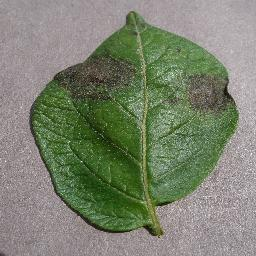

In [ ]:
import random
from PIL import Image

# Set seed
# random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.JPG"))

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

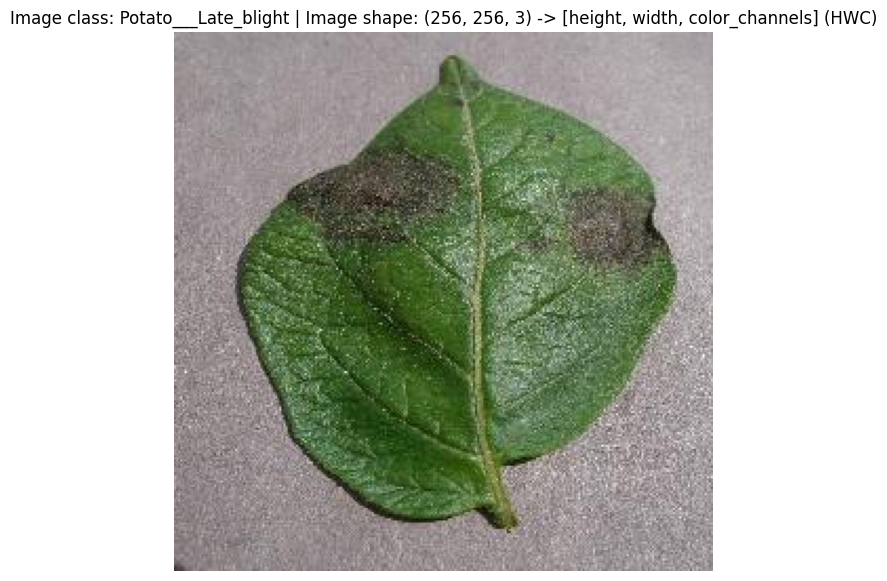

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(7, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels] (HWC)")
plt.axis(False);

array([[[151, 145, 147],
        [160, 154, 156],
        [162, 156, 158],
        ...,
        [170, 164, 168],
        [172, 166, 170],
        [165, 159, 163]],

       [[170, 164, 166],
        [164, 158, 160],
        [159, 153, 155],
        ...,
        [168, 162, 166],
        [168, 162, 166],
        [162, 156, 160]],

       [[169, 163, 165],
        [154, 148, 150],
        [148, 142, 144],
        ...,
        [168, 162, 166],
        [167, 161, 165],
        [161, 155, 159]],

       ...,

       [[ 84,  73,  77],
        [ 92,  81,  85],
        [ 99,  88,  92],
        ...,
        [160, 154, 156],
        [122, 116, 118],
        [152, 146, 148]],

       [[ 62,  51,  55],
        [ 78,  67,  71],
        [ 85,  74,  78],
        ...,
        [163, 157, 159],
        [141, 135, 137],
        [147, 141, 143]],

       [[ 63,  52,  56],
        [ 72,  61,  65],
        [ 76,  65,  69],
        ...,
        [158, 152, 154],
        [147, 141, 143],
        [161, 155, 157]]], dtype=uint8)
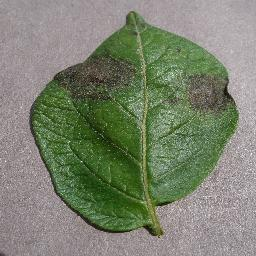

In [ ]:
img_as_array

## 3. Transforming data

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
SIZE = 64

data_transform = transforms.Compose([
    transforms.Resize(size=(SIZE, SIZE)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [ ]:
data_transform(img).shape

torch.Size([3, 64, 64])

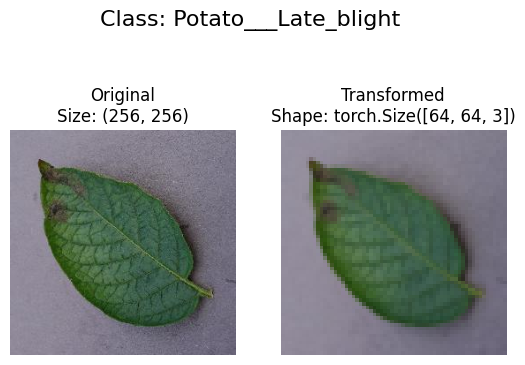

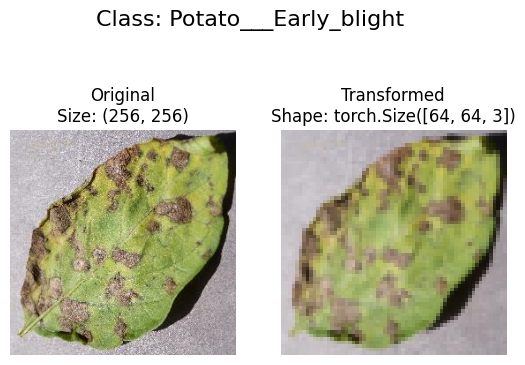

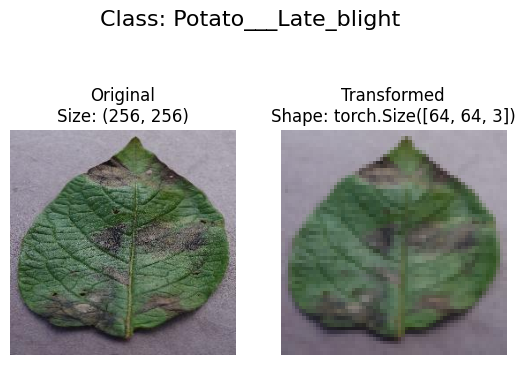

In [ ]:
def plot_transformed_images(image_paths: list, transform, n=3, seed=None):
  """
  Selects random images from a path of images and loads/transforms
  them then plots the original vs the transformed version.
  """
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      # Transform and plot target image
      transformed_image = transform(f).permute(1, 2, 0) # note we will need to change shape for matplotlib (C, H, W) -> (H, W, C)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=None)

## 4. Loading Image

In [ ]:
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 1721
     Root location: /content/data/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 431
     Root location: /content/data/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
train_dir, test_dir

(PosixPath('/content/data/train'), PosixPath('/content/data/test'))

In [ ]:
# Get class names as list
class_names = train_data.classes
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
# Get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [ ]:
# Check the lengths of our dataset
len(train_data), len(test_data)

(1721, 431)

In [ ]:
train_data.samples[0]

('/content/data/train/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG',
 0)

In [ ]:
# Index on the train_data Dataset to get a single image and label
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
 tensor([[[0.6941, 0.6902, 0.6863,  ..., 0.5608, 0.5647, 0.5765],
         [0.7059, 0.6902, 0.6941,  ..., 0.5569, 0.5647, 0.5725],
         [0.6863, 0.6941, 0.7020,  ..., 0.5490, 0.5686, 0.5490],
         ...,
         [0.6275, 0.6353, 0.6431,  ..., 0.5059, 0.4824, 0.5098],
         [0.6314, 0.6314, 0.6353,  ..., 0.5255, 0.5098, 0.5137],
         [0.6353, 0.6275, 0.6510,  ..., 0.4941, 0.4902, 0.4784]],

        [[0.6824, 0.6784, 0.6745,  ..., 0.5490, 0.5529, 0.5647],
         [0.6941, 0.6784, 0.6824,  ..., 0.5451, 0.5529, 0.5608],
         [0.6745, 0.6824, 0.6902,  ..., 0.5373, 0.5569, 0.5373],
         ...,
         [0.6235, 0.6275, 0.6275,  ..., 0.4902, 0.4667, 0.4941],
         [0.6235, 0.6196, 0.6235,  ..., 0.5098, 0.4941, 0.4980],
         [0.6275, 0.6196, 0.6353,  ..., 0.4784, 0.4745, 0.4627]],

        [[0.7098, 0.7059, 0.7020,  ..., 0.5765, 0.5804, 0.5922],
         [0.7216, 0.7059, 0.7098,  ..., 0.5725, 0.5804, 0.5882],
         [0.7020, 0.7098, 0.7176,  ..., 0.5

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute: torch.Size([64, 64, 3]) -> [height, width, color_channels]


Text(0.5, 1.0, 'Potato___Early_blight')

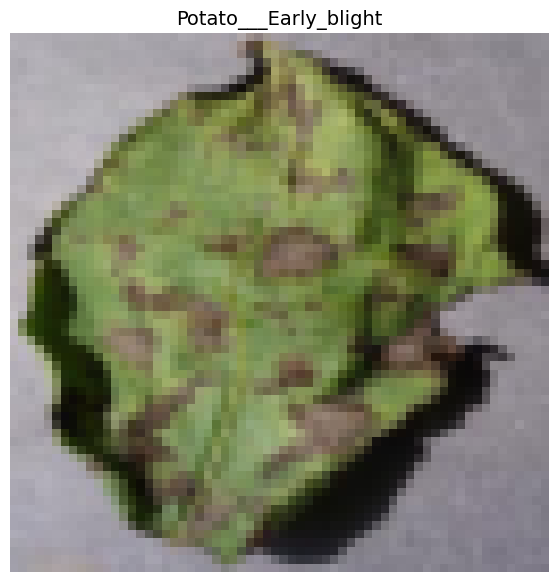

In [ ]:
# Rearrange the order dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14)

### 4.1 Turn loaded images into `DataLoader`'s


In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 1

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7d545da02d90>,
 <torch.utils.data.dataloader.DataLoader at 0x7d545d9c2850>)

In [ ]:
len(train_dataloader), len(test_dataloader)

(1721, 431)

In [ ]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, you can change the batch size if you like
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


In [ ]:
from typing import List
# 1. Create a function to take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
  # 2. Adjust display if n is too high
  if n > 10:
    n = 10
    display_shape = False
    print(f"For display, purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

  # 3. Set the seed
  if seed:
    random.seed(seed)

  # 4. Get random sample indexes
  random_samples_idx = random.sample(range(len(dataset)), k=n)

  # 5. Setup plot
  plt.figure(figsize=(16, 8))

  # 6. Loop through random indexes and plot them with matplotlib
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    # 7. Adjust tensor dimensions for plotting
    targ_image_adjust = targ_image.permute(1, 2, 0) # [color_channels, height, width] -> [height, width, color_channels]

    # Plot adjusted samples
    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title = f"Class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape: {targ_image_adjust.shape}"
    plt.title(title)

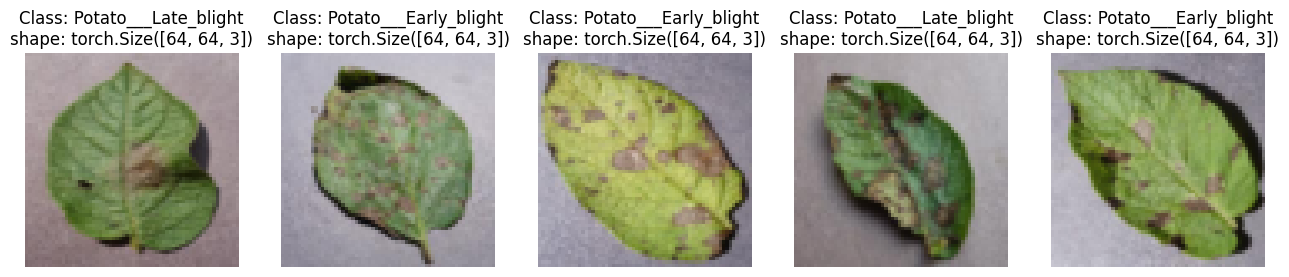

In [ ]:
# Display random images from the ImageFolder created Dataset
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=None)

## 5. Create Model

In [ ]:
from torch import nn

In [ ]:
class PotatoDiseaseModel_V0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2))
    self.conv_block_2 = nn.Sequential(
    nn.Conv2d(in_channels=hidden_units,
              out_channels=hidden_units,
              kernel_size=3,
              stride=1,
              padding=0),
    nn.ReLU(),
    nn.Conv2d(in_channels=hidden_units,
              out_channels=hidden_units,
              kernel_size=3,
              stride=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2,
                  stride=2))
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13,
                  out_features=output_shape)
    )

  def forward(self, x):
    # x = self.conv_block_1(x)
    # print(x.shape)
    # x = self.conv_block_2(x)
    # print(x.shape)
    # x = self.classifier(x)
    # print(x.shape)
    # return x
    return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [ ]:
torch.manual_seed(42)
model_0 = PotatoDiseaseModel_V0(input_shape=3, # number of color channels in our image data
                  hidden_units=10,
                  output_shape=len(class_names))

model_0

PotatoDiseaseModel_V0(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [ ]:
# Get a single image batch
image_batch, label_batch = next(iter(train_dataloader))
image_batch.shape, label_batch.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

In [ ]:
# Try a forward pass
model_0(image_batch)

tensor([[ 0.0209, -0.0010,  0.0090]], grad_fn=<AddmmBackward0>)

In [ ]:
# Install torchinfo, import if it's available
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
PotatoDiseaseModel_V0                    [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
# Create train_step()
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device=device):
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader data batches
  for batch, (X, y) in enumerate(dataloader):
    # Send data to the target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X) # output model logits

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate accuracy metric
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [ ]:
# Create a test step
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
  # Put model in eval mode
  model.eval()

  # Setup test loss and test accuracy values
  test_loss, test_acc = 0,  0

  # Turn on inference mode
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
      # Send data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculate the loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Calculate the accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

In [ ]:
from tqdm.auto import tqdm

# 1. Create a train function that takes in various model parameters + optimizer + dataloaders + loss function
def train(model: torch.nn.Module,
          train_dataloader,
          test_dataloader,
          optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device=device):

  # 2. Create empty results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # 3. Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)

    # 4. Print out what's happening
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

    # 5. Update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # 6. Return the filled results at the end of the epochs
  return results

In [ ]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 10

# Recreate an instance of TinyVGG
model_0 = PotatoDiseaseModel_V0(input_shape=3, # number of color channels of our target images
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.7719 | Train acc: 0.6223 | Test loss: 0.4822 | Test acc: 0.7912
Epoch: 1 | Train loss: 0.4844 | Train acc: 0.8071 | Test loss: 0.4229 | Test acc: 0.8074
Epoch: 2 | Train loss: 0.3841 | Train acc: 0.8396 | Test loss: 0.3531 | Test acc: 0.8608
Epoch: 3 | Train loss: 0.3274 | Train acc: 0.8722 | Test loss: 0.4171 | Test acc: 0.8422
Epoch: 4 | Train loss: 0.2943 | Train acc: 0.8873 | Test loss: 0.3155 | Test acc: 0.8840
Epoch: 5 | Train loss: 0.2555 | Train acc: 0.8995 | Test loss: 0.2428 | Test acc: 0.8956
Epoch: 6 | Train loss: 0.2233 | Train acc: 0.9094 | Test loss: 0.2553 | Test acc: 0.9002
Epoch: 7 | Train loss: 0.2401 | Train acc: 0.9053 | Test loss: 0.2892 | Test acc: 0.8956
Epoch: 8 | Train loss: 0.2047 | Train acc: 0.9216 | Test loss: 0.5401 | Test acc: 0.8283
Epoch: 9 | Train loss: 0.2055 | Train acc: 0.9163 | Test loss: 0.2299 | Test acc: 0.9188
Total training time: 165.449 seconds


In [ ]:
model_0_results

{'train_loss': [0.7719113388061902,
  0.48436608908893697,
  0.3840850333347721,
  0.3273785846912719,
  0.29427094378809504,
  0.25554128189707453,
  0.2232749235312359,
  0.24006268928358165,
  0.2047197146529443,
  0.20554801883644133],
 'train_acc': [0.6223126089482859,
  0.8070889018012783,
  0.8396281231841952,
  0.8721673445671121,
  0.8872748402091807,
  0.8994770482277745,
  0.9093550261475886,
  0.905287623474724,
  0.9215572341661824,
  0.916327716443928],
 'test_loss': [0.48215738058213375,
  0.42294095253763353,
  0.35308657328439386,
  0.417070633340554,
  0.31551924003752985,
  0.24276410781988964,
  0.25527945807457064,
  0.2892482060691361,
  0.5401438198162003,
  0.22992855197353906],
 'test_acc': [0.7911832946635731,
  0.8074245939675174,
  0.8607888631090487,
  0.8422273781902552,
  0.8839907192575406,
  0.8955916473317865,
  0.9002320185614849,
  0.8955916473317865,
  0.8283062645011601,
  0.9187935034802784]}

In [ ]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 25

# Recreate an instance of TinyVGG
model_1 = PotatoDiseaseModel_V0(input_shape=3, # number of color channels of our target images
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.7719 | Train acc: 0.6223 | Test loss: 0.4822 | Test acc: 0.7912
Epoch: 1 | Train loss: 0.4844 | Train acc: 0.8071 | Test loss: 0.4229 | Test acc: 0.8074
Epoch: 2 | Train loss: 0.3841 | Train acc: 0.8396 | Test loss: 0.3531 | Test acc: 0.8608
Epoch: 3 | Train loss: 0.3274 | Train acc: 0.8722 | Test loss: 0.4171 | Test acc: 0.8422
Epoch: 4 | Train loss: 0.2943 | Train acc: 0.8873 | Test loss: 0.3155 | Test acc: 0.8840
Epoch: 5 | Train loss: 0.2555 | Train acc: 0.8995 | Test loss: 0.2428 | Test acc: 0.8956
Epoch: 6 | Train loss: 0.2233 | Train acc: 0.9094 | Test loss: 0.2553 | Test acc: 0.9002
Epoch: 7 | Train loss: 0.2401 | Train acc: 0.9053 | Test loss: 0.2892 | Test acc: 0.8956
Epoch: 8 | Train loss: 0.2047 | Train acc: 0.9216 | Test loss: 0.5401 | Test acc: 0.8283
Epoch: 9 | Train loss: 0.2055 | Train acc: 0.9163 | Test loss: 0.2299 | Test acc: 0.9188
Epoch: 10 | Train loss: 0.1903 | Train acc: 0.9297 | Test loss: 0.1917 | Test acc: 0.9443
Epoch: 11 | Train lo

In [ ]:
from typing import Dict, List

In [ ]:
def plot_loss_curves(results: Dict[str, List[float]]):
  """Plots training curves of a results dictionary."""
  # Get the loss values of the results dictionary(training and test)
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  # Get the accuracy values of the results dictionary (training and test)
  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  # Figure out how mnay epochs there were
  epochs = range(len(results["train_loss"]))

  # Setup a plot
  plt.figure(figsize=(15, 7))

  # Plot the loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot the accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();

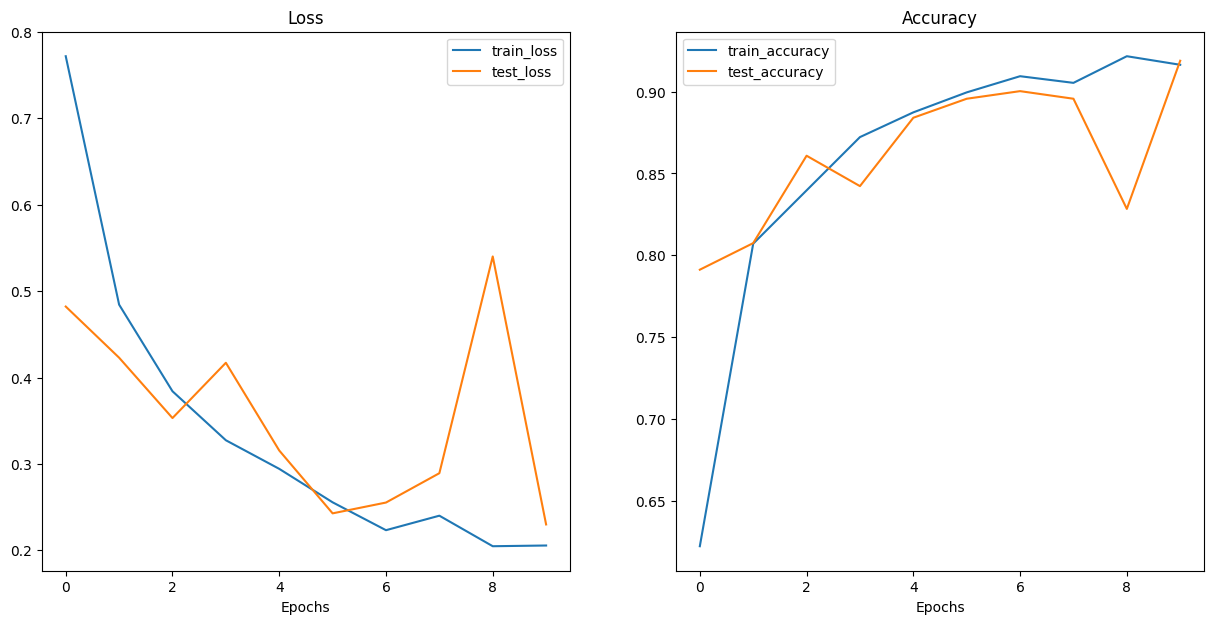

In [ ]:
plot_loss_curves(model_0_results)

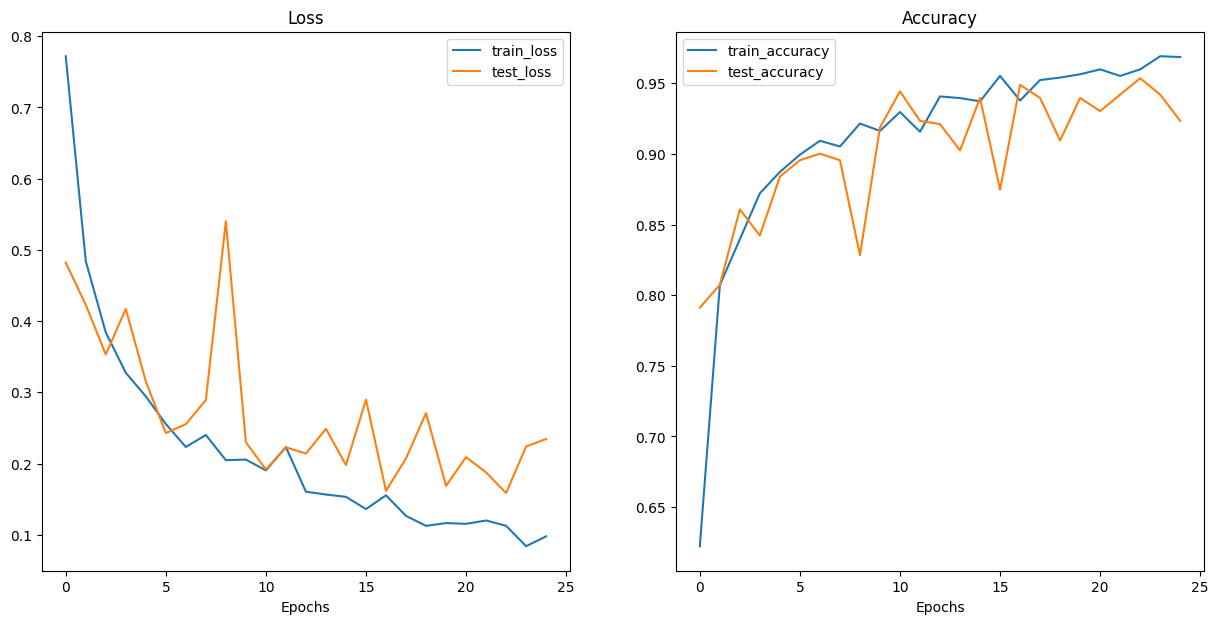

In [ ]:
plot_loss_curves(model_1_results)

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

SIZE = 256
BATCH_SIZE = 1

data_transform = transforms.Compose([
    transforms.Resize(size=(SIZE, SIZE)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])


train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)


In [ ]:
class PotatoDiseaseModel_V1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2))
    self.conv_block_2 = nn.Sequential(
    nn.Conv2d(in_channels=hidden_units,
              out_channels=hidden_units,
              kernel_size=3,
              stride=1,
              padding=0),
    nn.ReLU(),
    nn.Conv2d(in_channels=hidden_units,
              out_channels=hidden_units,
              kernel_size=3,
              stride=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2,
                  stride=2))
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*61*61,
                  out_features=output_shape)
    )

  def forward(self, x):
    # x = self.conv_block_1(x)
    # print(x.shape)
    # x = self.conv_block_2(x)
    # print(x.shape)
    # x = self.classifier(x)
    # print(x.shape)
    # return x
    return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [ ]:
torch.manual_seed(42)
model_2 = PotatoDiseaseModel_V1(input_shape=3, # number of color channels in our image data
                  hidden_units=10,
                  output_shape=len(class_names))

model_2

PotatoDiseaseModel_V1(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=37210, out_features=3, bias=True)
  )
)

In [ ]:
# Get a single image batch
image_batch, label_batch = next(iter(train_dataloader))
image_batch.shape, label_batch.shape

(torch.Size([1, 3, 256, 256]), torch.Size([1]))

In [ ]:
# Set random seeds
torch.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 10

# Recreate an instance of TinyVGG
model_2 = PotatoDiseaseModel_V1(input_shape=3, # number of color channels of our target images
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_2.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_2_results = train(model=model_2,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.7083 | Train acc: 0.7112 | Test loss: 0.4625 | Test acc: 0.8515
Epoch: 1 | Train loss: 0.4201 | Train acc: 0.8507 | Test loss: 0.3363 | Test acc: 0.8585
Epoch: 2 | Train loss: 0.2947 | Train acc: 0.8925 | Test loss: 0.3004 | Test acc: 0.8933
Epoch: 3 | Train loss: 0.2274 | Train acc: 0.9187 | Test loss: 0.2075 | Test acc: 0.9327
Epoch: 4 | Train loss: 0.1785 | Train acc: 0.9349 | Test loss: 0.2751 | Test acc: 0.8933
Epoch: 5 | Train loss: 0.1916 | Train acc: 0.9256 | Test loss: 0.3946 | Test acc: 0.8677
Epoch: 6 | Train loss: 0.1443 | Train acc: 0.9494 | Test loss: 0.2775 | Test acc: 0.9095
Epoch: 7 | Train loss: 0.0964 | Train acc: 0.9675 | Test loss: 0.2640 | Test acc: 0.9211
Epoch: 8 | Train loss: 0.1330 | Train acc: 0.9541 | Test loss: 0.4115 | Test acc: 0.8492
Epoch: 9 | Train loss: 0.0807 | Train acc: 0.9744 | Test loss: 0.3080 | Test acc: 0.9188
Total training time: 1317.018 seconds


In [89]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

SIZE = 64
BATCH_SIZE = 32

data_transform = transforms.Compose([transforms.Resize(size=(SIZE, SIZE)), transforms.RandomHorizontalFlip(p=0.5), transforms.ToTensor()])

train_data = datasets.ImageFolder(root=train_dir, transform=data_transform, target_transform=None)
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform)
train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)

In [90]:
class PotatoDiseaseModel_V2(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2))
    self.conv_block_2 = nn.Sequential(
    nn.Conv2d(in_channels=hidden_units,
              out_channels=hidden_units,
              kernel_size=3,
              stride=1,
              padding=0),
    nn.ReLU(),
    nn.Conv2d(in_channels=hidden_units,
              out_channels=hidden_units,
              kernel_size=3,
              stride=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2,
                  stride=2))
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13,
                  out_features=output_shape)
    )

  def forward(self, x):
    # x = self.conv_block_1(x)
    # print(x.shape)
    # x = self.conv_block_2(x)
    # print(x.shape)
    # x = self.classifier(x)
    # print(x.shape)
    # return x
    return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [91]:
torch.manual_seed(42)
model_3 = PotatoDiseaseModel_V2(input_shape=3, # number of color channels in our image data
                  hidden_units=10,
                  output_shape=len(class_names))

model_3

PotatoDiseaseModel_V2(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [94]:
# Set random seeds
torch.manual_seed(42)

# Set number of epochs and LR
NUM_EPOCHS = 10
LR = 0.01

# Recreate an instance of TinyVGG
model_3 = PotatoDiseaseModel_V2(input_shape=3, # number of color channels of our target images
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                             lr=LR)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_3_results = train(model=model_3,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.9552 | Train acc: 0.4670 | Test loss: 0.9653 | Test acc: 0.4464
Epoch: 1 | Train loss: 0.8969 | Train acc: 0.4857 | Test loss: 0.9648 | Test acc: 0.4464
Epoch: 2 | Train loss: 0.8928 | Train acc: 0.5026 | Test loss: 0.9665 | Test acc: 0.4464
Epoch: 3 | Train loss: 0.8880 | Train acc: 0.4995 | Test loss: 0.9467 | Test acc: 0.7589
Epoch: 4 | Train loss: 0.8761 | Train acc: 0.5931 | Test loss: 0.9231 | Test acc: 0.5960
Epoch: 5 | Train loss: 0.8433 | Train acc: 0.6405 | Test loss: 0.8740 | Test acc: 0.5804
Epoch: 6 | Train loss: 0.7583 | Train acc: 0.7289 | Test loss: 0.7309 | Test acc: 0.7902
Epoch: 7 | Train loss: 0.6490 | Train acc: 0.7454 | Test loss: 0.6645 | Test acc: 0.7433
Epoch: 8 | Train loss: 0.5608 | Train acc: 0.7884 | Test loss: 0.5830 | Test acc: 0.7656
Epoch: 9 | Train loss: 0.5287 | Train acc: 0.8084 | Test loss: 0.6453 | Test acc: 0.7433
Total training time: 93.164 seconds


In [101]:
class PotatoDiseaseModel_V3(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2))
    self.conv_block_2 = nn.Sequential(
    nn.Conv2d(in_channels=hidden_units,
              out_channels=hidden_units,
              kernel_size=3,
              stride=1,
              padding=0),
    nn.ReLU(),
    nn.Conv2d(in_channels=hidden_units,
              out_channels=hidden_units,
              kernel_size=3,
              stride=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2,
                  stride=2))
    self.conv_block_3 = nn.Sequential(
    nn.Conv2d(in_channels=hidden_units,
              out_channels=hidden_units,
              kernel_size=3,
              stride=1,
              padding=0),
    nn.ReLU(),
    nn.Conv2d(in_channels=hidden_units,
              out_channels=hidden_units,
              kernel_size=3,
              stride=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2,
                  stride=2))
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*4*4,
                  out_features=output_shape)
    )

  def forward(self, x):
    # x = self.conv_block_1(x)
    # print(x.shape)
    # x = self.conv_block_2(x)
    # print(x.shape)
    # x = self.conv_block_3(x)
    # print(x.shape)
    # x = self.classifier(x)
    # print(x.shape)
    # return x
    return self.classifier(self.conv_block_3(self.conv_block_2(self.conv_block_1(x))))

In [103]:
# Set random seeds
torch.manual_seed(42)

# Set number of epochs and LR
NUM_EPOCHS = 10
LR = 0.1

# Recreate an instance of TinyVGG
model_4 = PotatoDiseaseModel_V3(input_shape=3, # number of color channels of our target images
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(),
                             lr=LR)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_4_results = train(model=model_4,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.9394 | Train acc: 0.4400 | Test loss: 0.9620 | Test acc: 0.4464
Epoch: 1 | Train loss: 0.9039 | Train acc: 0.4646 | Test loss: 0.9646 | Test acc: 0.4464
Epoch: 2 | Train loss: 0.9015 | Train acc: 0.4637 | Test loss: 0.9655 | Test acc: 0.4464
Epoch: 3 | Train loss: 0.8996 | Train acc: 0.4976 | Test loss: 0.9739 | Test acc: 0.4464
Epoch: 4 | Train loss: 0.9007 | Train acc: 0.4718 | Test loss: 0.9687 | Test acc: 0.4464
Epoch: 5 | Train loss: 0.9006 | Train acc: 0.4690 | Test loss: 0.9624 | Test acc: 0.4464
Epoch: 6 | Train loss: 0.9031 | Train acc: 0.4619 | Test loss: 0.9743 | Test acc: 0.4464
Epoch: 7 | Train loss: 0.9017 | Train acc: 0.4681 | Test loss: 0.9725 | Test acc: 0.4464
Epoch: 8 | Train loss: 0.9017 | Train acc: 0.4678 | Test loss: 0.9645 | Test acc: 0.4464
Epoch: 9 | Train loss: 0.8885 | Train acc: 0.5429 | Test loss: 0.9088 | Test acc: 0.7054
Total training time: 95.098 seconds


In [105]:
# Set random seeds
torch.manual_seed(42)

# Set number of epochs and LR
NUM_EPOCHS = 10
LR = 0.001

# Recreate an instance of TinyVGG
model_5 = PotatoDiseaseModel_V3(input_shape=3, # number of color channels of our target images
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_5.parameters(),
                             lr=LR)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_5_results = train(model=model_5,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.9727 | Train acc: 0.4568 | Test loss: 0.9596 | Test acc: 0.4464
Epoch: 1 | Train loss: 0.8976 | Train acc: 0.4721 | Test loss: 0.9601 | Test acc: 0.4464
Epoch: 2 | Train loss: 0.7653 | Train acc: 0.6167 | Test loss: 0.6507 | Test acc: 0.7589
Epoch: 3 | Train loss: 0.5069 | Train acc: 0.8211 | Test loss: 0.5381 | Test acc: 0.7835
Epoch: 4 | Train loss: 0.4935 | Train acc: 0.8201 | Test loss: 0.6297 | Test acc: 0.7567
Epoch: 5 | Train loss: 0.4995 | Train acc: 0.8181 | Test loss: 0.5184 | Test acc: 0.7946
Epoch: 6 | Train loss: 0.4883 | Train acc: 0.8153 | Test loss: 0.7127 | Test acc: 0.7522
Epoch: 7 | Train loss: 0.4807 | Train acc: 0.8195 | Test loss: 0.5135 | Test acc: 0.8036
Epoch: 8 | Train loss: 0.4513 | Train acc: 0.8266 | Test loss: 0.4933 | Test acc: 0.7946
Epoch: 9 | Train loss: 0.4361 | Train acc: 0.8375 | Test loss: 0.4826 | Test acc: 0.7991
Total training time: 95.796 seconds


In [114]:
class PotatoDiseaseModel_V4(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2))
    self.conv_block_2 = nn.Sequential(
    nn.Conv2d(in_channels=hidden_units,
              out_channels=hidden_units,
              kernel_size=3,
              stride=1,
              padding=0),
    nn.ReLU(),
    nn.Conv2d(in_channels=hidden_units,
              out_channels=hidden_units,
              kernel_size=3,
              stride=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2,
                  stride=2))

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13,
                  out_features=output_shape)
    )

  def forward(self, x):
    # x = self.conv_block_1(x)
    # print(x.shape)
    # x = self.conv_block_2(x)
    # print(x.shape)
    # x = self.classifier(x)
    # print(x.shape)
    # return x
    return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [116]:
# Set random seeds
torch.manual_seed(42)

# Set number of epochs and LR
NUM_EPOCHS = 25
LR = 0.001

# Recreate an instance of TinyVGG
model_6 = PotatoDiseaseModel_V4(input_shape=3, # number of color channels of our target images
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_6.parameters(),
                             lr=LR)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_6_results = train(model=model_6,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.8729 | Train acc: 0.5814 | Test loss: 0.8097 | Test acc: 0.8036
Epoch: 1 | Train loss: 0.5643 | Train acc: 0.8155 | Test loss: 0.5470 | Test acc: 0.7835
Epoch: 2 | Train loss: 0.4813 | Train acc: 0.8291 | Test loss: 0.5414 | Test acc: 0.7790
Epoch: 3 | Train loss: 0.5156 | Train acc: 0.8045 | Test loss: 0.4956 | Test acc: 0.8125
Epoch: 4 | Train loss: 0.4658 | Train acc: 0.8372 | Test loss: 0.4733 | Test acc: 0.8080
Epoch: 5 | Train loss: 0.4371 | Train acc: 0.8406 | Test loss: 0.4625 | Test acc: 0.8036
Epoch: 6 | Train loss: 0.4218 | Train acc: 0.8437 | Test loss: 0.4487 | Test acc: 0.8112
Epoch: 7 | Train loss: 0.3833 | Train acc: 0.8572 | Test loss: 0.3929 | Test acc: 0.8287
Epoch: 8 | Train loss: 0.3533 | Train acc: 0.8616 | Test loss: 0.3392 | Test acc: 0.8570
Epoch: 9 | Train loss: 0.2954 | Train acc: 0.8905 | Test loss: 0.3091 | Test acc: 0.8929
Epoch: 10 | Train loss: 0.2321 | Train acc: 0.9139 | Test loss: 0.2399 | Test acc: 0.9006
Epoch: 11 | Train lo

In [117]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

SIZE = 64
BATCH_SIZE = 1

data_transform = transforms.Compose([transforms.Resize(size=(SIZE, SIZE)), transforms.RandomHorizontalFlip(p=0.5), transforms.ToTensor()])

train_data = datasets.ImageFolder(root=train_dir, transform=data_transform, target_transform=None)
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform)
train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)

In [118]:
class PotatoDiseaseModel_V5(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2))
    self.conv_block_2 = nn.Sequential(
    nn.Conv2d(in_channels=hidden_units,
              out_channels=hidden_units,
              kernel_size=3,
              stride=1,
              padding=0),
    nn.ReLU(),
    nn.Conv2d(in_channels=hidden_units,
              out_channels=hidden_units,
              kernel_size=3,
              stride=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2,
                  stride=2))

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13,
                  out_features=output_shape)
    )

  def forward(self, x):
    # x = self.conv_block_1(x)
    # print(x.shape)
    # x = self.conv_block_2(x)
    # print(x.shape)
    # x = self.classifier(x)
    # print(x.shape)
    # return x
    return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [119]:
# Set random seeds
torch.manual_seed(42)

# Set number of epochs and LR
NUM_EPOCHS = 25
LR = 0.001

# Recreate an instance of TinyVGG
model_7 = PotatoDiseaseModel_V4(input_shape=3, # number of color channels of our target images
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_7.parameters(),
                             lr=LR)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_7_results = train(model=model_7,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.7719 | Train acc: 0.6223 | Test loss: 0.4822 | Test acc: 0.7912
Epoch: 1 | Train loss: 0.4844 | Train acc: 0.8071 | Test loss: 0.4229 | Test acc: 0.8074
Epoch: 2 | Train loss: 0.3841 | Train acc: 0.8396 | Test loss: 0.3531 | Test acc: 0.8608
Epoch: 3 | Train loss: 0.3274 | Train acc: 0.8722 | Test loss: 0.4171 | Test acc: 0.8422
Epoch: 4 | Train loss: 0.2943 | Train acc: 0.8873 | Test loss: 0.3155 | Test acc: 0.8840
Epoch: 5 | Train loss: 0.2555 | Train acc: 0.8995 | Test loss: 0.2428 | Test acc: 0.8956
Epoch: 6 | Train loss: 0.2233 | Train acc: 0.9094 | Test loss: 0.2553 | Test acc: 0.9002
Epoch: 7 | Train loss: 0.2401 | Train acc: 0.9053 | Test loss: 0.2892 | Test acc: 0.8956
Epoch: 8 | Train loss: 0.2047 | Train acc: 0.9216 | Test loss: 0.5401 | Test acc: 0.8283
Epoch: 9 | Train loss: 0.2055 | Train acc: 0.9163 | Test loss: 0.2299 | Test acc: 0.9188
Epoch: 10 | Train loss: 0.1903 | Train acc: 0.9297 | Test loss: 0.1917 | Test acc: 0.9443
Epoch: 11 | Train lo

In [156]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [157]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([3, 64, 64])

Text(0.5, 1.0, 'Potato___Early_blight')

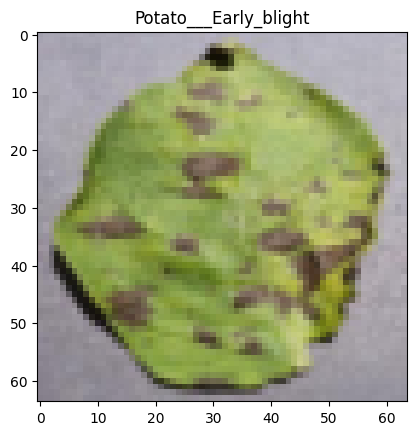

In [158]:
plt.imshow(test_samples[0].squeeze().permute(1, 2, 0))
plt.title(class_names[test_labels[0]])

In [159]:
# Make predictions
pred_probs = make_predictions(model=model_7,
                              data=test_samples)

# View first two prediction probabilities
pred_probs

tensor([[1.0000e+00, 8.2998e-09, 7.1272e-26],
        [1.1496e-03, 9.9885e-01, 1.5500e-08],
        [4.2030e-05, 6.5341e-01, 3.4655e-01],
        [9.9946e-01, 5.4176e-04, 9.3939e-25],
        [9.9938e-01, 6.2017e-04, 3.8230e-11],
        [1.1722e-02, 9.8828e-01, 5.4790e-10],
        [9.9736e-01, 2.6403e-03, 1.4586e-18],
        [9.9995e-01, 5.4455e-05, 1.1550e-11],
        [1.0000e+00, 1.0737e-08, 1.1650e-10]])

In [160]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([0, 1, 1, 0, 0, 1, 0, 0, 0])

In [161]:
test_labels

[0, 1, 2, 0, 0, 1, 0, 0, 0]

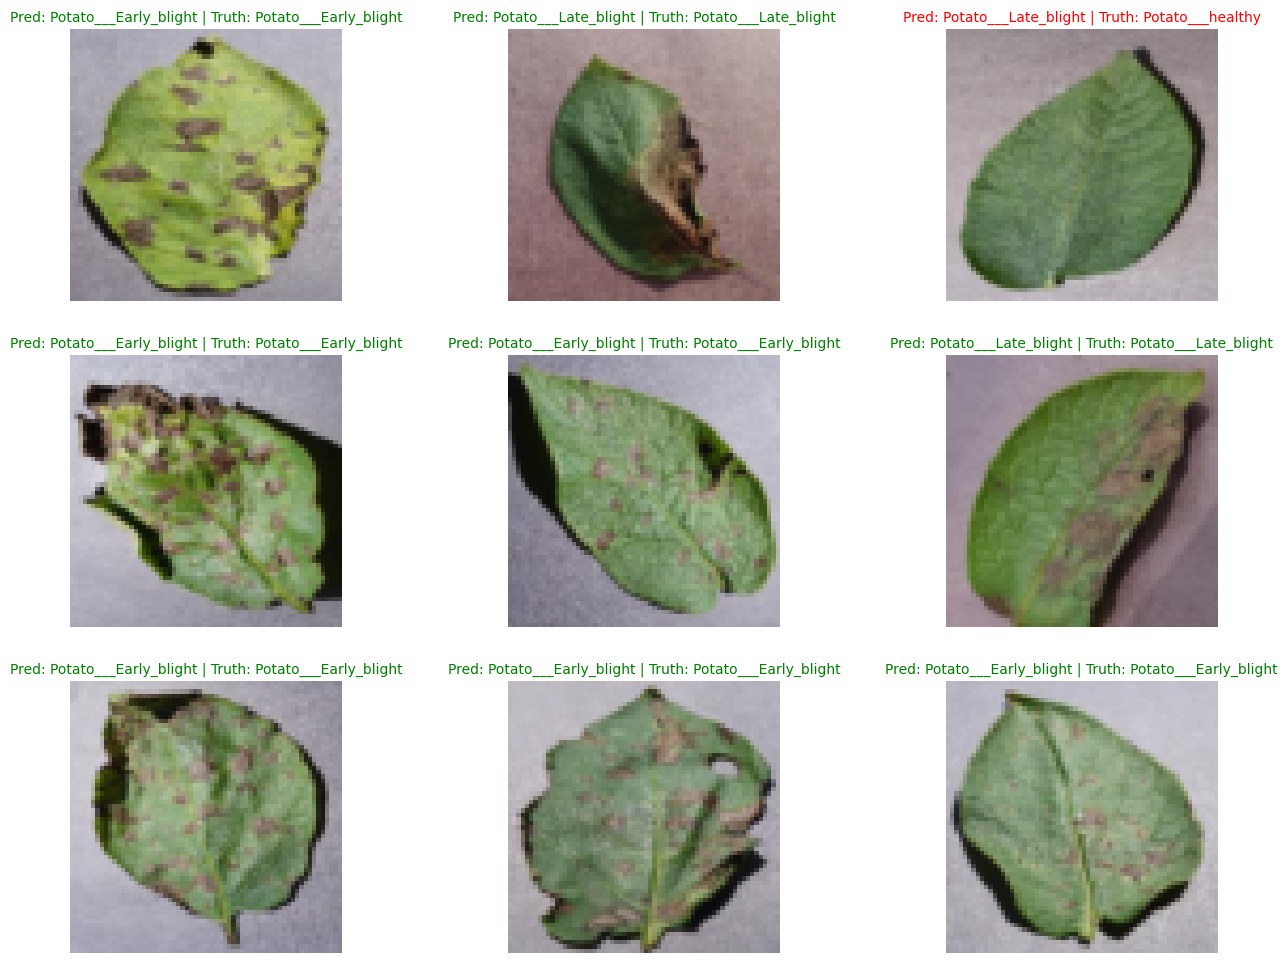

In [162]:
# Plot predictions
plt.figure(figsize=(16, 12))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze().permute(1, 2, 0))

  # Find the prediction (in text form, e.g "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False);

In [165]:
!pip install torchmetrics -U mlxtend
import torchmetrics, mlxtend

In [171]:
# Import tqdm.auto
from tqdm.auto import tqdm


# 1. Make predictions with trained model
y_preds = []
model_7.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):

    # Do the forward pass
    y_logit = model_7(X)

    # Turn predictions from logits -> prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    # Put prediction on CPU for evaluation
    y_preds.append(y_pred)

# Concatenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions...:   0%|          | 0/431 [00:00<?, ?it/s]

tensor([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [169]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

<ipython-input-176-5a99f7dc1017>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred_tensor = torch.tensor(y_pred_tensor)


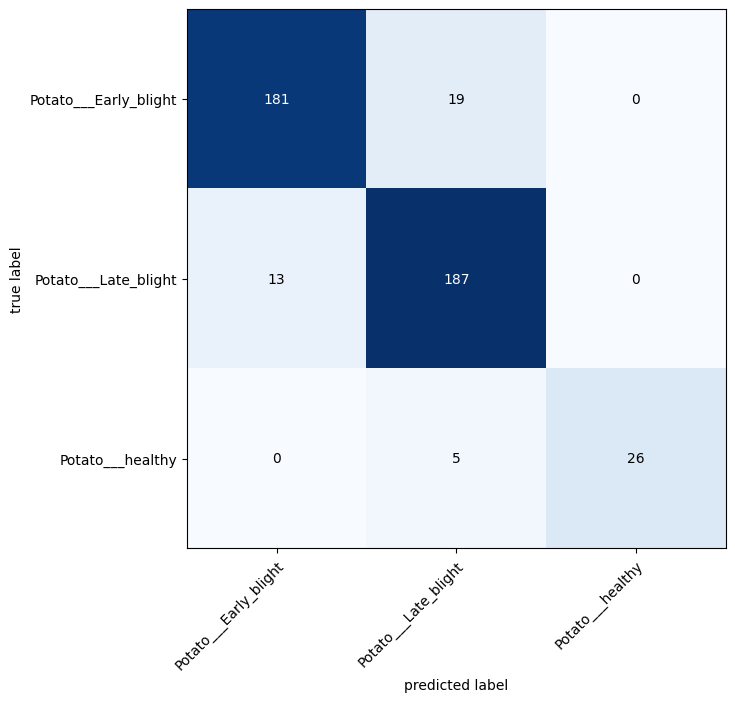

In [176]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task="multiclass",
                          num_classes=len(class_names))

y_pred_tensor = torch.tensor(y_pred_tensor)
y_true_tensor = torch.tensor(test_data.targets)

confmat_tensor = confmat(preds=y_pred_tensor,
                         target=y_true_tensor)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)